### Selección de Características

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import LeaveOneOut

In [2]:
# Cargar el archivo CSV con los datos procesados en un DataFrame de pandas
data = pd.read_csv('../data/data.csv')

In [3]:
# Separar las características de la variable objetivo en el DataFrame
X,y = data.drop('Estado al egreso', axis=1), data['Estado al egreso']

In [4]:
import pickle as pkl

# Cargar el modelo Random Forest previamente guardado desde el archivo .pkl
with open('../models/rf.pkl', 'rb') as file:
    best_rf = pkl.load(file)

# Cargar el modelo de Regresión Logística previamente guardado desde el archivo .pkl
with open('../models/lr.pkl', 'rb') as file:
    best_lr = pkl.load(file)


El análisis se centró en las importancias de las características derivadas del modelo para identificar las variables más predictivas. Esta metodología garantiza que las características seleccionadas realmente impulsen las predicciones, al mismo tiempo que se mantiene la interpretabilidad.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Escalar las características para que estén en un rango entre 0 y 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el mejor modelo Random Forest con los datos escalados
best_rf.fit(X_scaled, y)

# Obtener la importancia de cada característica según el modelo
coefs = best_rf.feature_importances_

# Crear una serie ordenada con las importancias absolutas de las características
importances_rf = pd.Series(np.abs(coefs), index=X.columns).sort_values(ascending=False)
print(importances_rf)

Sofa                                           0.352717
# de hemoderivados  usados                     0.270039
componentes triada letal                       0.109430
Daño orgánico tubular asociado                 0.060579
Edad                                           0.055069
App Cardiopatía Isquémica                      0.050000
Apache II                                      0.044931
Número de compresas utilizadas                 0.019382
VAM                                            0.017949
Horas transcurridas al desempaquetamiento      0.014193
App HTA                                        0.005711
Etiología del empaquetamiento                  0.000000
App AB                                         0.000000
Sexo                                           0.000000
Lesión de vía biliar asociada                  0.000000
Presencia de hipotensión arterial o shock      0.000000
Tiempo quirúrgico                              0.000000
App DM                                         0

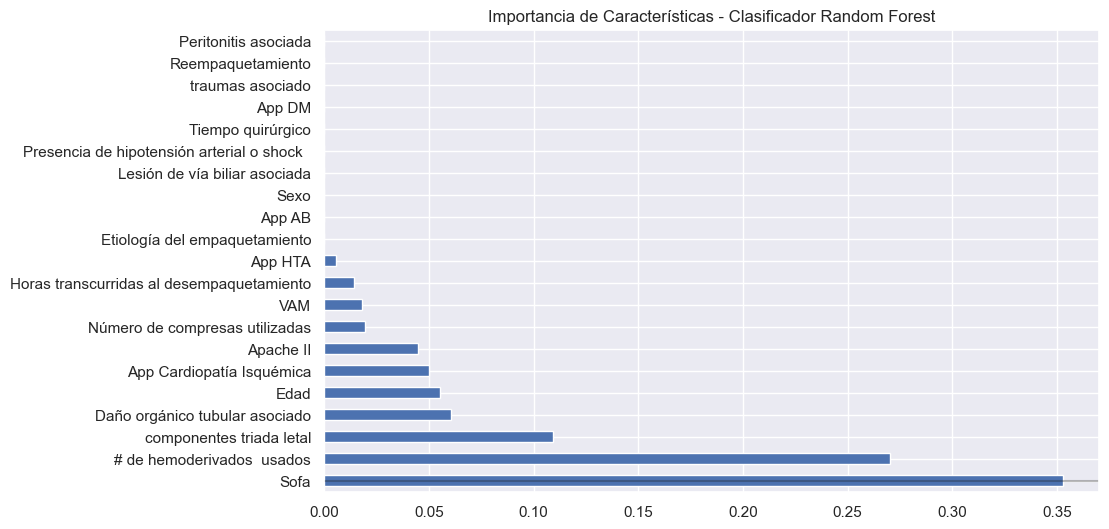

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')

# Graficar la importancia de las características en un gráfico de barras horizontal
importances_rf.plot(kind='barh')

# Título y etiquetas
plt.title('Importancia de Características - Clasificador Random Forest')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Guardar la figura
plt.savefig('../figures/importancias_rf.png', dpi=300, bbox_inches='tight')

# Crear un DataFrame con las características y sus coeficientes para análisis ordenado
coef_df = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': best_rf.feature_importances_,
    'Coeficiente_Absoluto': np.abs(best_rf.feature_importances_)
}).sort_values('Coeficiente_Absoluto', ascending=False)


In [7]:
# Ajustar el mejor modelo Regresión Logística con los datos escalados
best_lr.fit(X_scaled, y)

# Obtener la importancia de cada característica según el modelo
coefs = best_lr.coef_[0]

# Crear una serie ordenada con las importancias absolutas de las características
importances_lr = pd.Series(np.abs(coefs), index=X.columns).sort_values(ascending=False)
print(importances_lr)

componentes triada letal                       0.196777
Sofa                                           0.184955
VAM                                            0.158918
Apache II                                      0.131098
App Cardiopatía Isquémica                      0.127576
Horas transcurridas al desempaquetamiento      0.105114
# de hemoderivados  usados                     0.094480
traumas asociado                               0.093495
Daño orgánico tubular asociado                 0.090667
Sexo                                           0.077167
App HTA                                        0.070436
Número de compresas utilizadas                 0.063096
Lesión de vía biliar asociada                  0.051951
App AB                                         0.038569
Presencia de hipotensión arterial o shock      0.035157
Tiempo quirúrgico                              0.022660
Reempaquetamiento                              0.019734
Peritonitis asociada                           0

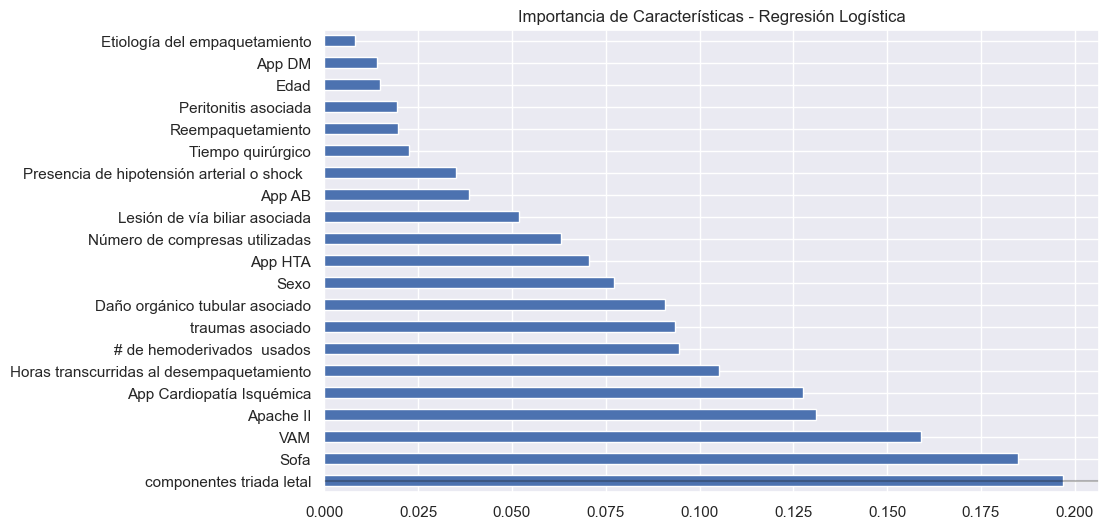

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')

# Graficar la importancia de las características en un gráfico de barras horizontal
importances_lr.plot(kind='barh')

# Título
plt.title('Importancia de Características - Regresión Logística')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Guardar la figura
plt.savefig('../figures/importancias_lr.png', dpi = 300, bbox_inches='tight')

# Crear un DataFrame con las características y sus coeficientes para análisis ordenado
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lr.coef_[0],
    'Abs_Coefficient': np.abs(best_lr.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)


### Análisis de importancia por consenso
La importancia por consenso es una técnica para combinar los rankings de importancia de características provenientes de diferentes tipos de modelos, con el fin de identificar características robustas que impactan consistentemente las predicciones. Es especialmente valiosa para conjuntos de datos pequeños, donde el ruido aleatorio puede distorsionar las interpretaciones de modelos individuales.

In [9]:
# Normalizar las importancias de características de Random Forest y Regresión Logística
rf_norm = importances_rf / importances_rf.max()
lr_norm = importances_lr / importances_lr.abs().max()

# Encontrar las características comunes entre ambos modelos
common_features = rf_norm.index.intersection(lr_norm.index)

# Crear un DataFrame que combine las importancias normalizadas y calcule un consenso promedio
feature_consensus = pd.DataFrame({
    'Característica': common_features,
    'RF_importancia': rf_norm[common_features].values,
    'RL_importancia': lr_norm[common_features].values,
    'Consenso': (rf_norm[common_features].values + lr_norm[common_features].values) / 2
})

# Ordenar las características según la importancia consensuada de mayor a menor
feature_consensus = feature_consensus.sort_values('Consenso', ascending=False)

feature_consensus


,Característica,RF_importancia,RL_importancia,Consenso
0,Sofa,1.000000,0.939922,0.969961
2,componentes triada letal,0.310250,1.000000,0.655125
1,# de hemoderivados usados,0.765597,0.480138,0.622868
8,VAM,0.050887,0.807603,0.429245
6,Apache II,0.127385,0.666224,0.396804
5,App Cardiopatía Isquémica,0.141757,0.648329,0.395043
3,Daño orgánico tubular asociado,0.171749,0.460762,0.316256
9,Horas transcurridas al desempaquetamiento,0.040240,0.534179,0.287209
18,traumas asociado,0.000000,0.475130,0.237565
13,Sexo,0.000000,0.392155,0.196077


In [10]:
top_features = feature_consensus.sort_values('Consenso', ascending=False)['Característica'].to_list()


#### Optimización por Número de Características

In [11]:
from sklearn.metrics import f1_score

# Definición del método Leave-One-Out para la validación cruzada.
loo = LeaveOneOut()

k_values = range(1, len(top_features) + 1) # Rango de valores de k a probar
k_results = {'k': [], 'rf_f1': [], 'lr_f1': []} # Diccionario para almacenar los resultados F1-score para cada valor de k y cada modelo.

# Bucle principal para iterar sobre diferentes números de características (k)
for k in k_values:
    # Selección de las 'k' características más importantes de la lista top_features.
    selected_features = top_features[:k]
    X_k = X[selected_features]
    
    rf_preds = [] # Almacenar las predicciones del Random Forest en cada iteración LOOCV 
    for train_idx, test_idx in loo.split(X_k):
        best_rf.fit(X_k.iloc[train_idx], y.iloc[train_idx])
        rf_preds.append(best_rf.predict(X_k.iloc[test_idx])[0])

    # Calcular el F1-score global para el Random Forest utilizando todas las predicciones LOOCV.
    rf_f1 = f1_score(y, rf_preds)
    
    lr_preds = [] # Almacenar las predicciones de Regresión Logística en cada iteració LOOCV
    for train_idx, test_idx in loo.split(X_k):
        best_lr.fit(X_k.iloc[train_idx], y.iloc[train_idx])
        lr_preds.append(best_lr.predict(X_k.iloc[test_idx])[0])

    # Calcular el F1-score global para la Regresión Logística utilizando todas las predicciones LOOCV.   
    lr_f1 = f1_score(y, lr_preds)
    
    # Almacenar los resultados F1-score para el valor de 'k' actual
    k_results['k'].append(k)
    k_results['rf_f1'].append(rf_f1)
    k_results['lr_f1'].append(lr_f1)

# Encontrar el índice del F1-score máximo para el modelo actual.
optimal_k = {}
for model in ['rf', 'lr']:
    best_idx = np.argmax(k_results[f'{model}_f1'])
    optimal_k[model] = {
        'k': k_values[best_idx], # El valor de 'k' que produjo el mejor F1-score
        'f1': k_results[f'{model}_f1'][best_idx] # El F1-score máximo alcanzado
    }

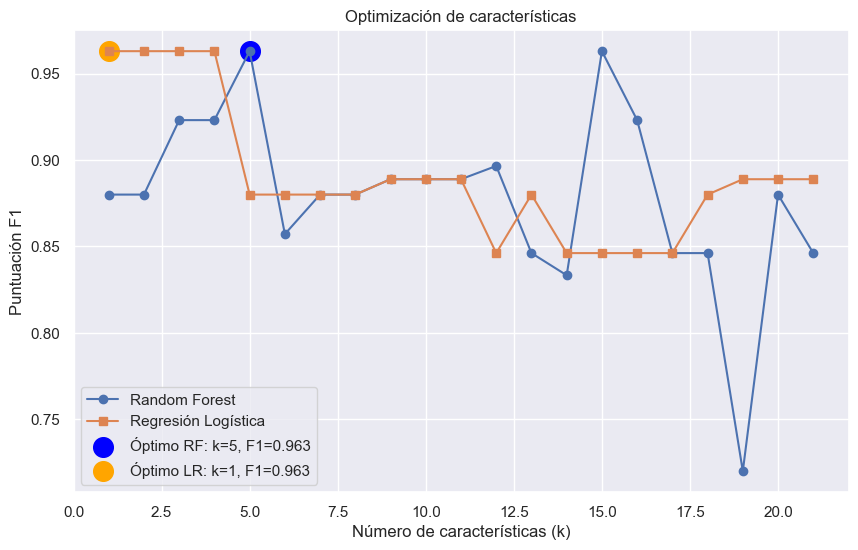

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar la puntuación F1 en función del número de características para cada modelo
plt.plot(k_results['k'], k_results['rf_f1'], 'o-', label='Random Forest')
plt.plot(k_results['k'], k_results['lr_f1'], 's-', label='Regresión Logística')

# Marcar los puntos óptimos para cada modelo 
for model, color in zip(['rf', 'lr'], ['blue', 'orange']):
    k_opt = optimal_k[model]['k']
    f1_opt = optimal_k[model]['f1']
    plt.scatter(k_opt, f1_opt, s=200, color=color, 
                label=f'Óptimo {model.upper()}: k={k_opt}, F1={f1_opt:.3f}')

# Etiquetas y título
plt.xlabel('Número de características (k)')
plt.ylabel('Puntuación F1')
plt.title('Optimización de características')
plt.legend()
plt.grid(True)

# Guardar la figura 
plt.savefig('../figures/optimization.png', dpi=300, bbox_inches='tight')



#### El análisis reveló:

- Random Forest alcanzó el mejor desempeño (F1 = 0.963) utilizando 5 características clave.

- Regresión Logística igualó la puntuación (F1 = 0.963) pero con solo 1 característica.


Aunque ambos modelos entregaron métricas similares, basarse en una sola variable clínica (Regresión Logística) es insuficiente para un análisis médico robusto.  Se seleccionó Random Forest porque mantiene un alto rendimiento y, además, ofrece una perspectiva multifactorial esencial en la medicina de cuidados críticos.


In [16]:
features = top_features[:5]
features

['Sofa',
 'componentes triada letal',
 '# de hemoderivados  usados',
 'VAM',
 'Apache II']

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el mejor modelo Random Forest con los 5 features seleccionados
best_rf = RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=20, random_state=1).fit(X[features], y)

In [18]:
# Guardar el modelo Random Forest entrenado en un archivo .pkl para uso futuro
with open('../models/new_rf.pkl', 'wb') as file:
    pkl.dump(best_rf, file)

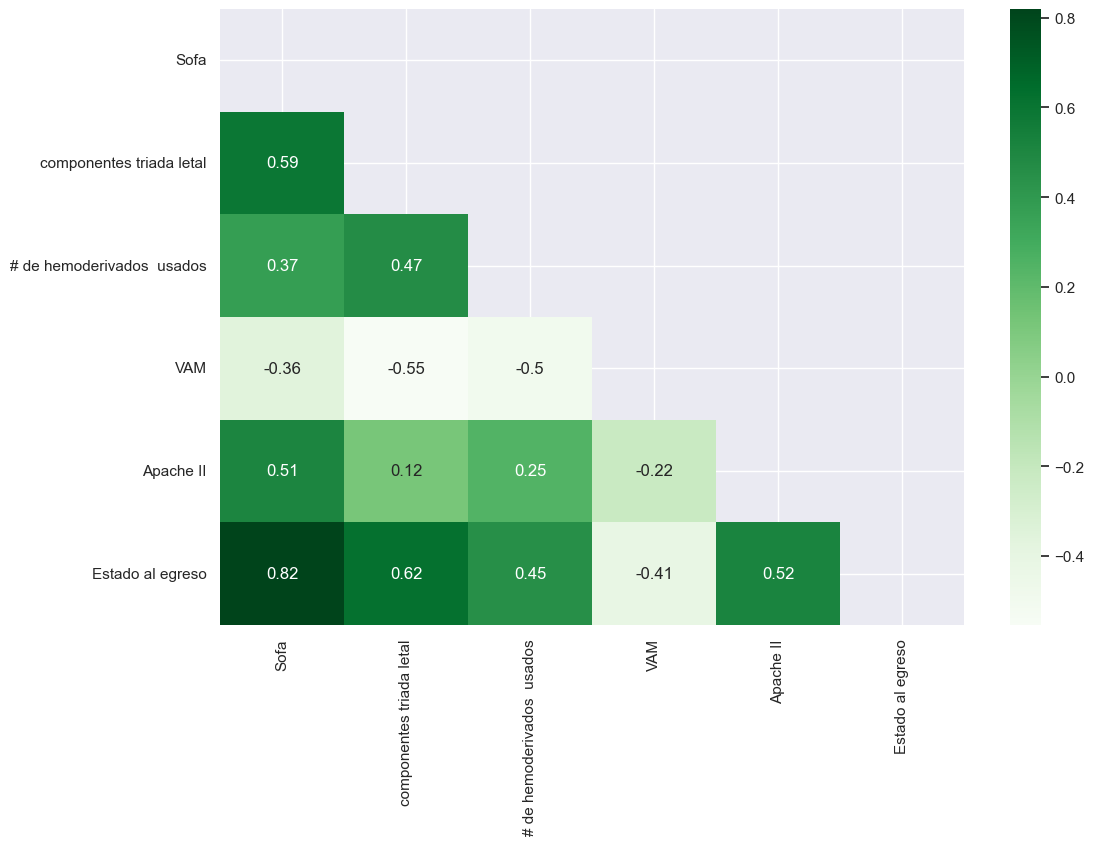

In [19]:
# Calcular la matriz de correlación entre las características seleccionadas y la variable objetivo
matrix = X[features].join(y).corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(matrix, annot=True, cmap='Greens', mask=mask)
plt.savefig('../figures/correlacion_seleccionados.png', dpi = 300, bbox_inches='tight')


In [20]:
# Crear un nuevo DataFrame que combina las 5 características seleccionadas con la variable objetivo
new_data = X[features].join(y)
# Guardar este nuevo DataFrame en un archivo CSV sin incluir el índice
new_data.to_csv('../data/new_data.csv', index=False)